# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in orders to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credits cards versus those who pay with cash.

## Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Loading the dataset

In [89]:
df=pd.read_csv('yellow.csv')

In [90]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [91]:
df.shape

(6405008, 18)

In [92]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [93]:
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [94]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [95]:
df['duration']=df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [96]:
df= df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [97]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [98]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [99]:
(65441/len(df))*100

1.021716132126611

In [100]:
df.dropna(inplace=True)

In [101]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [102]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']= df['payment_type'].astype('int64')

In [103]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [104]:
df.drop_duplicates(inplace= True)

In [105]:
df.shape

(3007861, 5)

In [106]:
df['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [107]:
df['payment_type'].value_counts(normalize=True)

1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: payment_type, dtype: float64

In [108]:
df= df[df['payment_type']<3]
df= df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [109]:
df.shape

(2780283, 5)

In [110]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [111]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [112]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [113]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [114]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [115]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


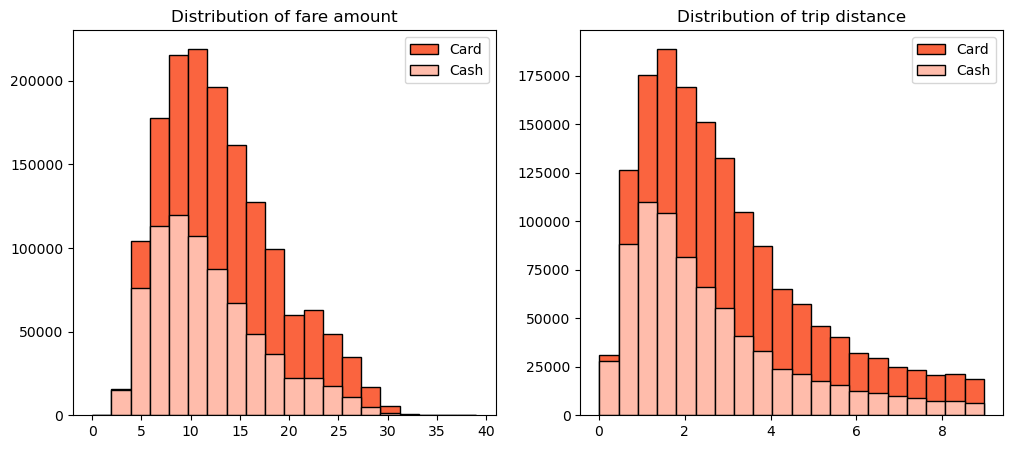

In [116]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype ='barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label= 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype ='barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label= 'Cash')
plt.legend()


plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype ='barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label= 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype ='barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label= 'Cash')
plt.legend()
plt.show()

In [117]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

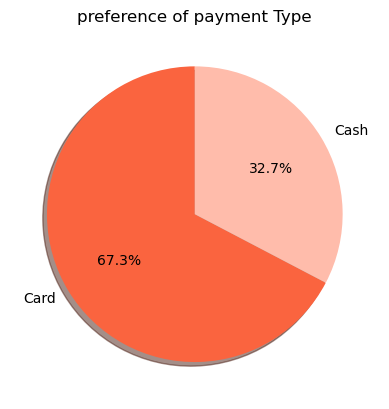

In [118]:
plt.title('preference of payment Type')
plt.pie(df['payment_type'].value_counts(normalize= True), labels = df['payment_type'].value_counts().index,
       startangle = 90, shadow = True, autopct = '%1.1f%%', colors= ['#FA643F','#FFBCAB'])
plt.show()

In [119]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns= {'passenger_count':'count'},inplace =True)
passenger_count.reset_index(inplace=True)

In [120]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [121]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [122]:
df=pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


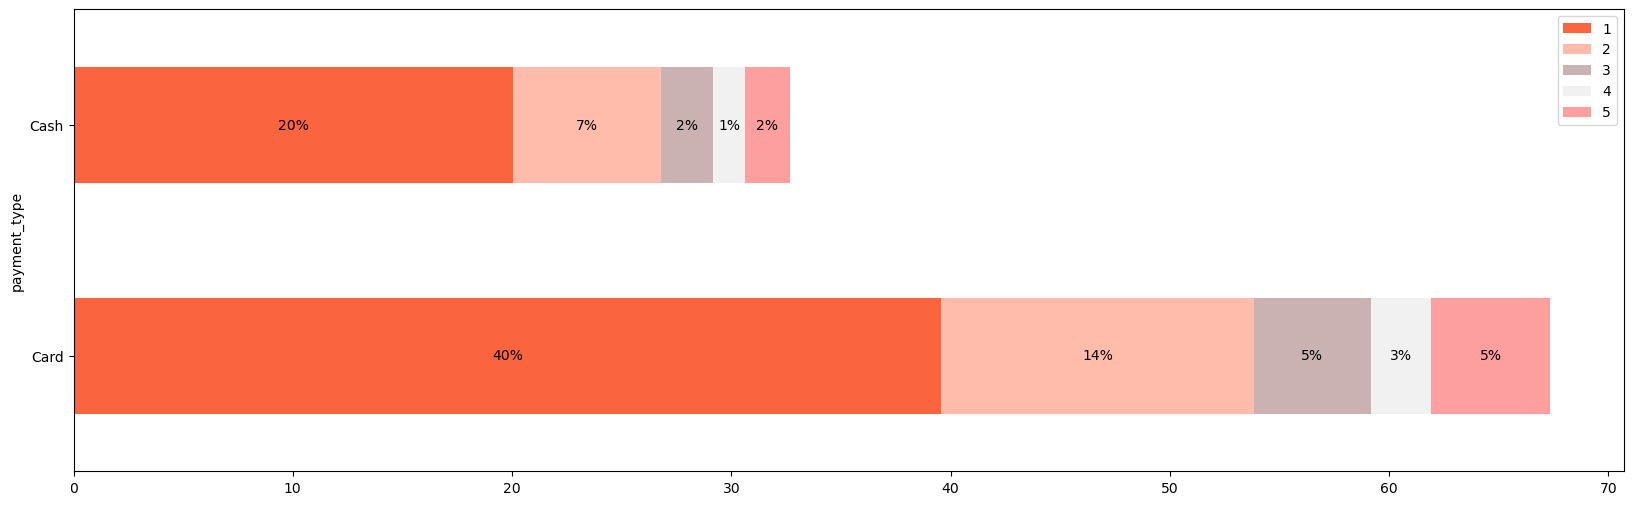

In [123]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type',kind = 'barh',stacked = True, ax=ax, color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])



for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
           y + height / 2,
           '{:.0f}%'.format(width),
           horizontalalignment = 'center',
           verticalalignment='center')



Null hypothesis : There is no difference in average fare between customers who use credit cards and customers who use cash.

Alternate hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash

In [ ]:
sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [ ]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']

In [ ]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print(' T statistic', t_stats, 'p-value',p_value)

T statistic 169.2111527245052 p-value 0.0

## Journey Insights

### . Customers paying with cards tend to have a slightly higher average trip distance and fare amount compared to those paying with cash.

### .Indicates that customers preferes to pay more with cards whe they have high fare amount an long trip distance.

